#  SANDPILE MODEL

<IPython.core.display.Javascript object>


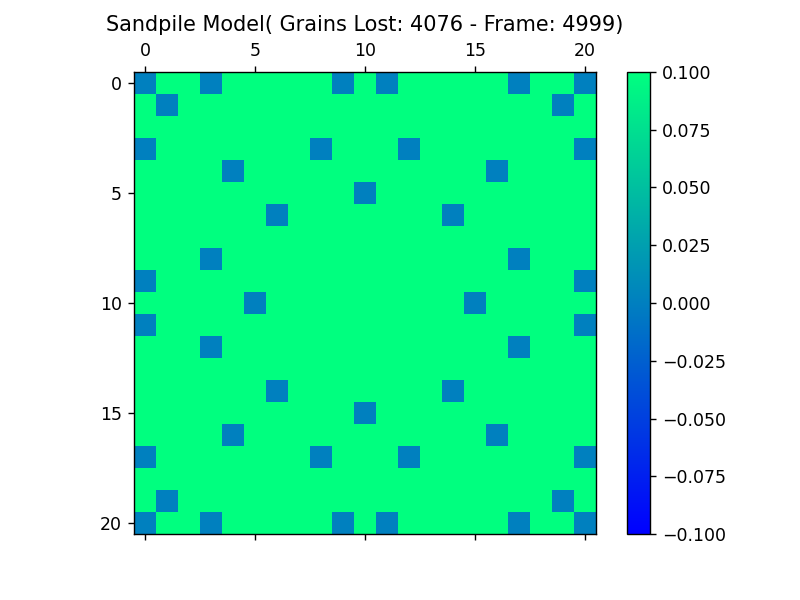

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



# intialize a grid of NxN
N = 21
grid = np.zeros((N,N), dtype= int) #creates a grid
threshold = 4 #The number after which the redistribution takes place
grains_lost = 0 #global count
lost_grains = []  #to store the grains when they are lost after an avalanche



#define the toppling rule(how the grains should be redistributed after crossing the threshold)
def topple(grid, i, j, ):
    global grains_lost
    if grid[i, j] >= threshold:
        grid[i, j] -= threshold
        if i > 0:
            grid[i-1, j] += 1   # grains Topple  up the grid
        else:
            grains_lost += 1
        if i < N - 1:
            grid[i+1, j] += 1
        else:
            grains_lost += 1
        if j > 0:
            grid[i, j-1] += 1
        else:
            grains_lost += 1
        if j < N - 1:
            grid[i, j+1] += 1
        else:
            grains_lost += 1
        
        
# update the grid, triggering avalanches
def update(frames):
    global grains_lost   
    #Add grains to the center cell
    center = N //2
    grid[center, center]+= 1
    
   # Track the grains lost during this avalanche
    initial_grains_lost = grains_lost  # Record initial grains lost count

    stable = False
    while not stable:
        stable = True
        for i in range(N):
            for j in range(N):
                if grid[i, j] >= threshold:
                    topple(grid, i, j)
                    stable = False  # Continue toppling while the grid is unstable

    # After the avalanche ends, calculate grains lost during this event
    grains_lost_this_avalanche = grains_lost - initial_grains_lost
    lost_grains.append(grains_lost_this_avalanche)  # Track avalanche event

    
    
    # Run the simulation for a certain number of steps

    
    # Update the heatmap with the current grid state
    mat.set_data(grid)
    ax.set_title(f"Sandpile Model( Grains Lost: {grains_lost} - Frame: {frames})")

    return [mat]


fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap='winter')

plt.colorbar(mat, ax=ax)

# Create an animation
ani = FuncAnimation(fig, update, frames=5000, interval=10, blit=True, repeat = False)

# Display the animation
plt.show()


#After the simulation ends, plot a power law distribution graph


# understanding the graph

The X- axis shows the grains that are lost in the avalanche, either small or big. The graph is a log-log plot, so bascially each step is a multiplication, that emphasizes that the range of possible avalanches can be quite wide.
The Y- axis shows how frequently a particular size of avalanche occurs.


The plot displays a more stable distribution, following what seems to be a power-law, typical for sandpile models. This indicates scale-invariant behavior, which is characteristic of systems exhibiting self-organized criticality.
The smoother curve without significant drops shows that in a normal grid, the grains lost in avalanches have a more predictable pattern, where the frequency of avalanches of varying sizes decreases steadily as size increases.!

<IPython.core.display.Javascript object>


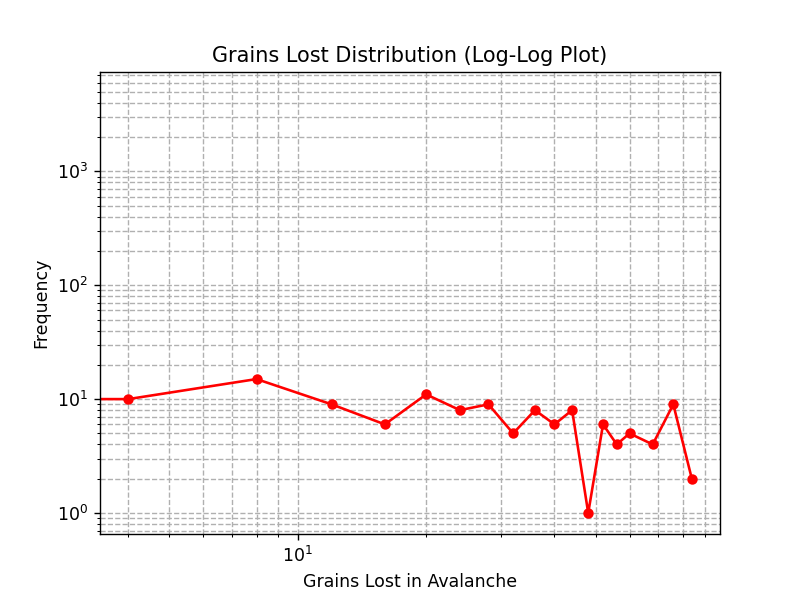

In [74]:
%matplotlib notebook

unique_loss_sizes, counts_loss = np.unique(lost_grains, return_counts=True)

plt.loglog(unique_loss_sizes, counts_loss, 'ro-', markersize=5)


plt.xlabel("Grains Lost in Avalanche")
plt.ylabel("Frequency")
plt.title("Grains Lost Distribution (Log-Log Plot)")
plt.grid(True, which="both", ls="--")
plt.show()

# Variation:- The sierpinski fractal has been inculcated in the sandpile model.

The sierpinski fractal, is named after the Polish mathematician Wacław Sierpińskiand it is created through an iterative process, where a simple shape is repeatedly subdivided to form increasingly smaller copies of itself.

In this, I have created a sierpinski grid and the toppling rule has been modified to sierpinski toppling rule, where the grains, when crosses the threshold,  are redistributed diagnolly giving the fractal effect. However, because the grid is already structured in a Sierpinski pattern, so you’ll observe a fractal on top of a fractal effect. This can lead to interesting emergent behavior, as the grains will only topple on the Sierpinski "active" cells (those that satisfy the bitwise AND condition).  You will see recursive fractal structures emerge, which is characteristic of self-organized criticality and fractal dynamics. This could be particularly interesting for visualizing fractal growth in a controlled manner.


In [59]:
!pip install pygame

<IPython.core.display.Javascript object>


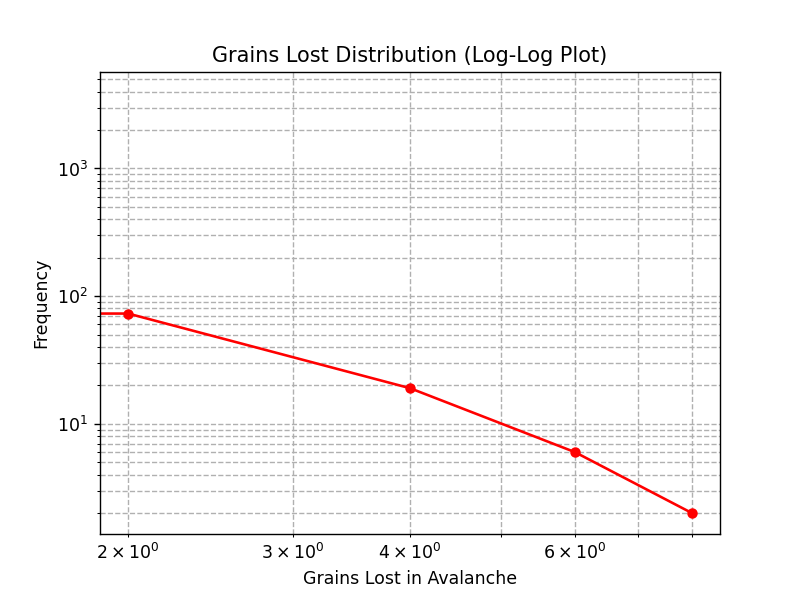

In [75]:



%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pygame
from pygame.locals import*
pygame.init()

# intialize a grid of
N = 65
cell_size = 4
screen_size = N*cell_size #creates a grid
window = pygame.display.set_mode((screen_size,screen_size))
Cyan = (178, 102, 255)
pink = (255, 102, 178)
yellow = (255, 255, 51)
black = (0 ,0, 0)
clock = pygame.time.Clock()




grid =np.zeros((N,N), dtype=int)
threshold = 4 #The number after which the redistribution takes place
grains_lost = 0 #global count
lost_grains = []  #to store the grains when they are lost after an avalanche


#intialize the seirnpinski pattern on the grid
def seirpinski_pattern(grid):
    for i in range(N):
        for j in range(N):
            if (i & j) == 0:   #bitwise condition.
                grid[i, j] = 1
            else:
                grid[i,j] = 0
    return grid
                

#draw the sierpinski grid on the window
def drawing_grid(window, grid):
    for i in range(N):
        for j in range(N):
            if grid[i,j]==0:
                color = pink
            else:
                color = yellow
            pygame.draw.rect(window,color,pygame.Rect(i*cell_size, j*cell_size, cell_size, cell_size))
            
    


#define the toppling rule(how the grains should be redistributed after crossing the threshold)
def topple_sierpinski(grid, i, j):
    global grains_lost
    if grid[i, j] >= threshold:
        grid[i, j] -= threshold
        
        
        if i > 0 and j > 0 : 
            grid[i-1, j-1] += 1   
        else:
            grains_lost += 1   # grain is at the edge and is lost
        if i < N - 1 and j > 0: 
            grid[i+1, j-1] += 1   #grain topples down the grid
        else:
            grains_lost += 1   
        if i> 0 and j < N-1: 
            grid[i-1, j+1] += 1   #grain topples towards the keft
        else:
            grains_lost += 1  
        if j< N-1 and i < N-1: 
            grid[i+1, j+1] += 1  #grain topples at the right side of the grid
        else:
            grains_lost += 1     
            
            
            
                    
# update the grid, triggering avalanches
def update_sierpinski(grid):
    global grains_lost   
    #Add grains to the center cell
    center = N //2
    grid[center, center]+= 1
    
   # Track the grains lost during this avalanche
    initial_grains_lost = grains_lost  # Record initial grains lost count

    for i in range(N):
        for j in range(N):
            topple_sierpinski(grid, i, j)

    # After the avalanche ends, calculate grains lost during this event
    grains_lost_this_avalanche = grains_lost - initial_grains_lost
    lost_grains.append(grains_lost_this_avalanche)  # Track avalanche event

def plot_frequrncy_of_grains_lost():
    unique_loss_sizes, counts_loss = np.unique(lost_grains, return_counts=True)

    plt.loglog(unique_loss_sizes, counts_loss, 'ro-', markersize=5)

    
    plt.xlabel("Grains Lost in Avalanche")
    plt.ylabel("Frequency")
    plt.title("Grains Lost Distribution (Log-Log Plot)")
    plt.grid(True, which="both", ls="--")
    plt.show()
    
#main simulation
def run_simulation(frames):
    global grains_lost
    frames_number = 0
    running = True
    while running and frames_number< frames:
        
        for event in pygame.event.get():
            
            if event.type == pygame.QUIT:
                
                running = False
                
        update_sierpinski(grid)
        window.fill(pink)
        drawing_grid(window, grid)
        
        grains_lost_text = f"Grains Lost: {grains_lost}"
        frames_text = f"frames : {frames_number}"
        font = pygame.font.SysFont("Arial", 14)
        text_surface = font.render(grains_lost_text, True, black)
        frames_surface = font. render(frames_text, True, black)
        
        window.blit(text_surface, (10, 10))
        window.blit(frames_surface, (10, 30))
        pygame.display.set_caption("Sierpinski_sandpile_model")
        
        frames_number += 1
        pygame.image.save(window, "last_frame.png")
        
        pygame.display.flip()
        pygame.time.delay(50)
        clock.tick(50)
    pygame.quit()
    plot_frequrncy_of_grains_lost()
    #after the simulation ends, plot the graph

seirpinski_pattern(grid)
run_simulation(4000)

  # IF VISUALIZATION OF THE PYGAME WINDOW NOT POSSIBLE, I ATTACHED A IMAGE BELOW THE MARKDOWN

# understanding the sierpinski-sandpile graph.

This graph is quite similar to that of the power law distribution graph, which shows a steadily decreasing curve. It shows that the smaller avalanches are very frequent and the larger ones are not. The fractal structure affects how avalanches propagate, but in this instance, the system behaves more uniformly, leading to a more typical power-law behavior. This statement has been made because when the grid size was small(N=33), the graph was more erratic, showing no-uniformity.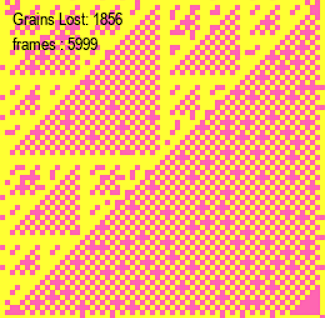. This can indicate that a lot of factors, like the toppling rule,  neighbourhood behaviour and the system size helps determing the movement of the grains.

In this version, the smooth power-law distribution indicates that while the grid is still fractal, the avalanche behavior more closely follows the standard critical behavior of the sandpile model.



In [68]:
#VISUALIZATION OF THE GRID
!pip install Ipython

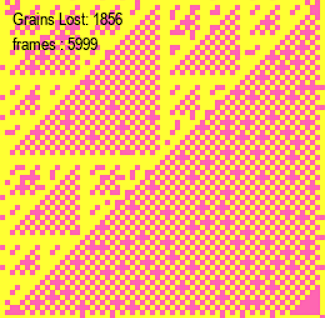

In [82]:
from IPython.display import Image
Image(filename="C:\\Users\\91637\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-06 132536.png")


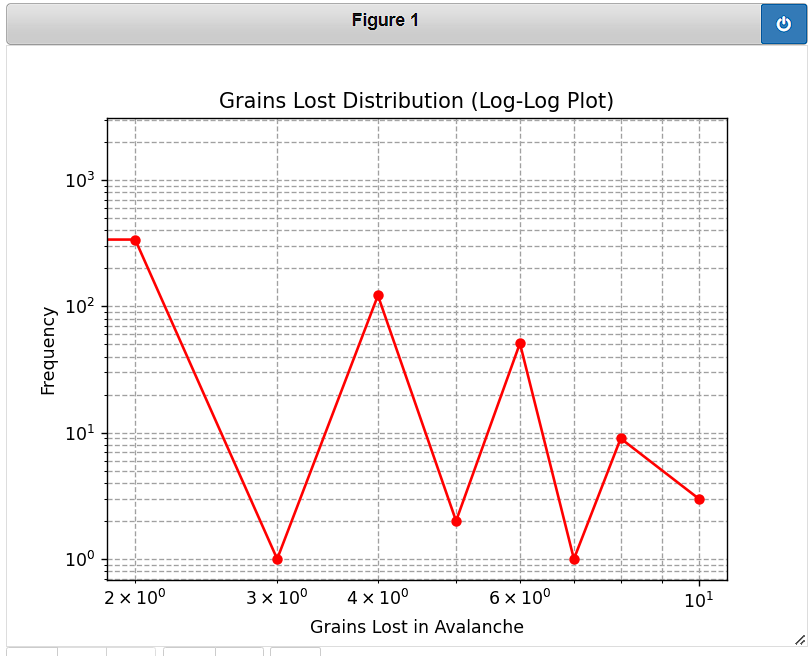

In [83]:
# grain distribution plot-for N= 33).
#The grid is likely causing non-uniform stress distribution, 
#meaning certain regions in the fractal grid accumulate stress differently, leading to large or small avalanches unpredictably.
#what I comprehend out of this graph is, becausew there is a limited space for avalanches
#and the boundary effects are also different, it could have lead to this kind of graph.
Image(filename= "C:\\Users\\91637\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-06 125355.png")